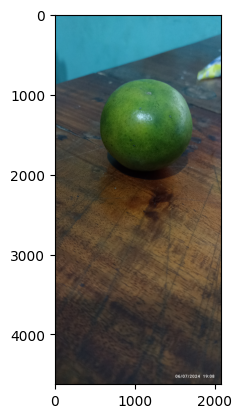

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# %matplotlib inline
# unutk membaca gambar gunakan gambar sesuai dengan yg dimiliki
image = cv2.imread('img/jeruk_diatas_meja_kantor.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)





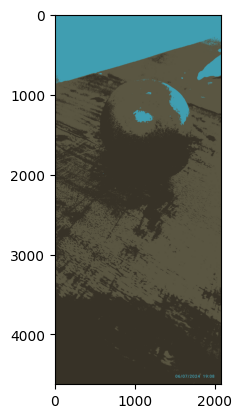

In [36]:
# berfungsi untuk Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1,3))
# berfungsi untuk mengkonversikan ke tipe float
pixel_vals = np.float32(pixel_vals)

#baris kode di bawah ini menentukan kriteria agar algoritme berhenti berjalan,
#yang akan terjadi adalah 100 iterasi dijalankan atau epsilon (yang merupakanakurasi yang dibutuhkan)
#menjadi 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# lalu lakukan k-means clustering dengan jumlah cluster yang ditetapkan sebagai 3
#juga pusat acak pada awalnya dipilih untuk pengelompokan k-means
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10,
cv2.KMEANS_RANDOM_CENTERS)
# mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)


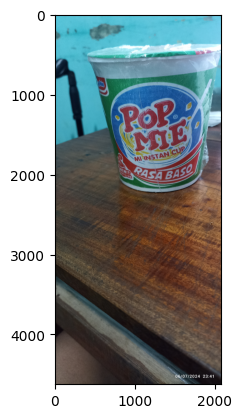

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# %matplotlib inline
# unutk membaca gambar gunakan gambar sesuai dengan yg dimiliki
image = cv2.imread('img/popmie.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


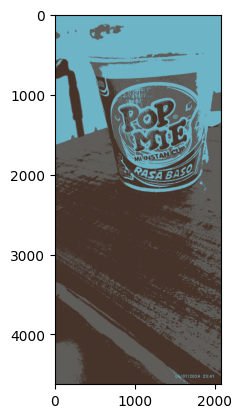

In [ ]:
# berfungsi untuk Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1,3))
# berfungsi untuk mengkonversikan ke tipe float
pixel_vals = np.float32(pixel_vals)

#baris kode di bawah ini menentukan kriteria agar algoritme berhenti berjalan,
#yang akan terjadi adalah 100 iterasi dijalankan atau epsilon (yang merupakanakurasi yang dibutuhkan)
#menjadi 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
# lalu lakukan k-means clustering dengan jumlah cluster yang ditetapkan sebagai 3
#juga pusat acak pada awalnya dipilih untuk pengelompokan k-means
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10,
cv2.KMEANS_RANDOM_CENTERS)
# mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
# membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)


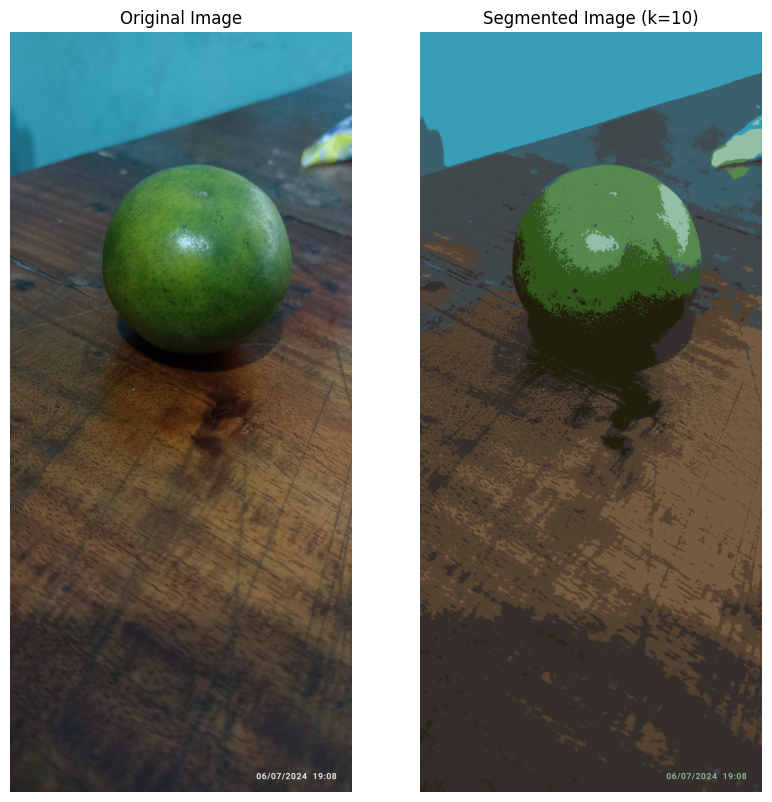

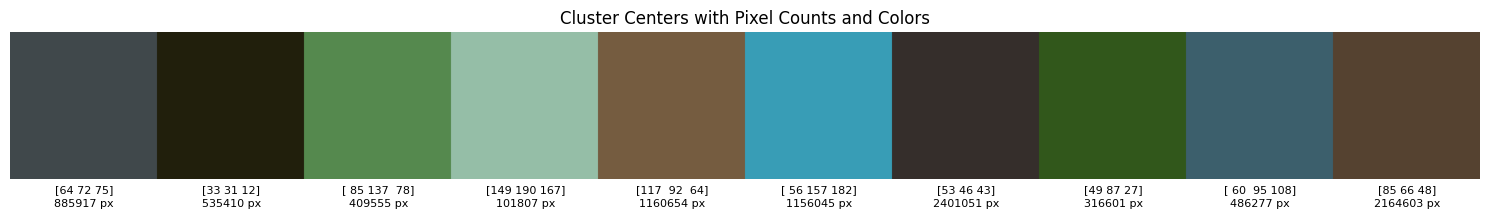

Original Image Size: (4624, 2080, 3)
Segmented Image Size: (4624, 2080, 3)
Cluster Details:
Cluster 0: 885917 pixels (Color: [64 72 75])
Cluster 1: 535410 pixels (Color: [33 31 12])
Cluster 2: 409555 pixels (Color: [ 85 137  78])
Cluster 3: 101807 pixels (Color: [149 190 167])
Cluster 4: 1160654 pixels (Color: [117  92  64])
Cluster 5: 1156045 pixels (Color: [ 56 157 182])
Cluster 6: 2401051 pixels (Color: [53 46 43])
Cluster 7: 316601 pixels (Color: [49 87 27])
Cluster 8: 486277 pixels (Color: [ 60  95 108])
Cluster 9: 2164603 pixels (Color: [85 66 48])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Membaca gambar
image_path = 'img/jeruk_diatas_meja_kantor.jpg'
image = cv2.imread(image_path)

# Mengubah warna gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Membentuk ulang gambar menjadi array 2D di mana setiap baris adalah piksel dan 3 nilai warna (RGB)
pixel_vals = image_rgb.reshape((-1, 3))

# Mengonversi data piksel ke tipe float32
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria untuk algoritma k-means dan mengatur jumlah cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 10

# Menjalankan algoritma k-means
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi pusat cluster kembali ke tipe 8-bit
centers = np.uint8(centers)

# Memetakan piksel ke pusat cluster mereka
segmented_data = centers[labels.flatten()]

# Membentuk ulang data yang telah dikelompokkan menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image_rgb.shape))

# Menampilkan gambar yang telah dikelompokkan
plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image (k=10)')
plt.axis('off')

# Menghitung jumlah piksel untuk setiap warna dalam cluster
unique, counts = np.unique(labels, return_counts=True)

# Membuat dictionary untuk warna dan jumlahnya
color_counts = dict(zip(unique, counts))

# Menampilkan warna cluster sebagai gambar horizontal dengan label
plt.figure(figsize=(15, 5))
bar_height = 100
color_bar = np.zeros((bar_height, k * 100, 3), dtype=np.uint8)

for i, (cluster_num, count) in enumerate(color_counts.items()):
    color_bar[:, i*100:(i+1)*100] = centers[cluster_num]
    plt.text(i * 100 + 50, bar_height + 10, f'{centers[cluster_num]}', ha='center', va='bottom', fontsize=8, color='black')
    plt.text(i * 100 + 50, bar_height + 20, f'{count} px', ha='center', va='bottom', fontsize=8, color='black')

plt.imshow(color_bar)
plt.title('Cluster Centers with Pixel Counts and Colors')
plt.axis('off')

plt.tight_layout()
plt.show()

# Menampilkan informasi cluster
print(f"Original Image Size: {image_rgb.shape}")
print(f"Segmented Image Size: {segmented_image.shape}")
print("Cluster Details:")
for cluster_num, count in color_counts.items():
    color = centers[cluster_num]
    print(f"Cluster {cluster_num}: {count} pixels (Color: {color})")


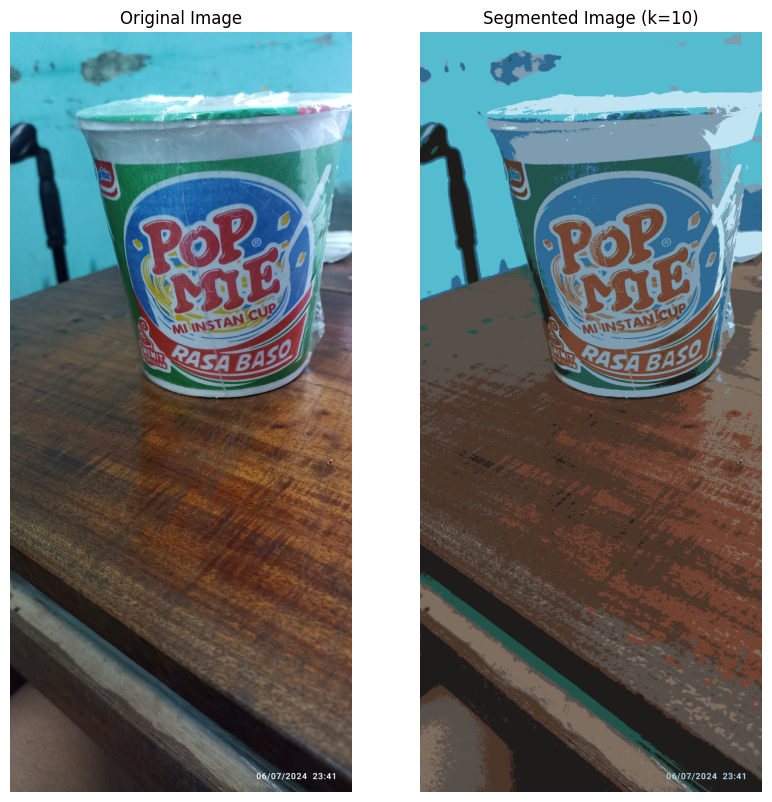

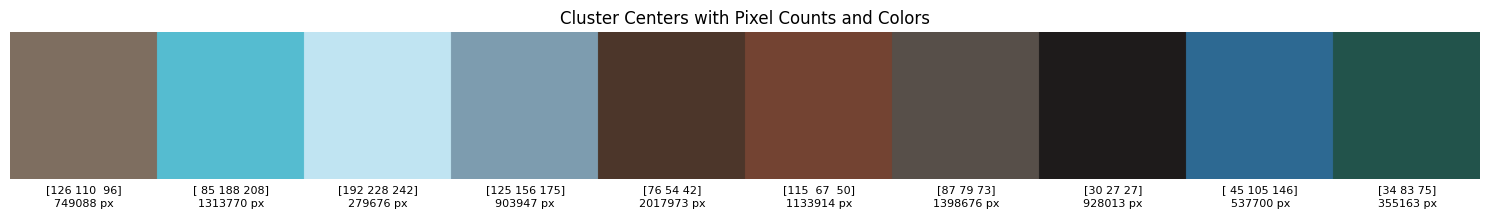

Original Image Size: (4624, 2080, 3)
Segmented Image Size: (4624, 2080, 3)
Cluster Details:
Cluster 0: 749088 pixels (Color: [126 110  96])
Cluster 1: 1313770 pixels (Color: [ 85 188 208])
Cluster 2: 279676 pixels (Color: [192 228 242])
Cluster 3: 903947 pixels (Color: [125 156 175])
Cluster 4: 2017973 pixels (Color: [76 54 42])
Cluster 5: 1133914 pixels (Color: [115  67  50])
Cluster 6: 1398676 pixels (Color: [87 79 73])
Cluster 7: 928013 pixels (Color: [30 27 27])
Cluster 8: 537700 pixels (Color: [ 45 105 146])
Cluster 9: 355163 pixels (Color: [34 83 75])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Membaca gambar
image_path = 'img/popmie.jpg'
image = cv2.imread(image_path)

# Mengubah warna gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Membentuk ulang gambar menjadi array 2D di mana setiap baris adalah piksel dan 3 nilai warna (RGB)
pixel_vals = image_rgb.reshape((-1, 3))

# Mengonversi data piksel ke tipe float32
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria untuk algoritma k-means dan mengatur jumlah cluster
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 10

# Menjalankan algoritma k-means
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi pusat cluster kembali ke tipe 8-bit
centers = np.uint8(centers)

# Memetakan piksel ke pusat cluster mereka
segmented_data = centers[labels.flatten()]

# Membentuk ulang data yang telah dikelompokkan menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image_rgb.shape))

# Menampilkan gambar yang telah dikelompokkan
plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image (k=10)')
plt.axis('off')

# Menghitung jumlah piksel untuk setiap warna dalam cluster
unique, counts = np.unique(labels, return_counts=True)

# Membuat dictionary untuk warna dan jumlahnya
color_counts = dict(zip(unique, counts))

# Menampilkan warna cluster sebagai gambar horizontal dengan label
plt.figure(figsize=(15, 5))
bar_height = 100
color_bar = np.zeros((bar_height, k * 100, 3), dtype=np.uint8)

for i, (cluster_num, count) in enumerate(color_counts.items()):
    color_bar[:, i*100:(i+1)*100] = centers[cluster_num]
    plt.text(i * 100 + 50, bar_height + 10, f'{centers[cluster_num]}', ha='center', va='bottom', fontsize=8, color='black')
    plt.text(i * 100 + 50, bar_height + 20, f'{count} px', ha='center', va='bottom', fontsize=8, color='black')

plt.imshow(color_bar)
plt.title('Cluster Centers with Pixel Counts and Colors')
plt.axis('off')

plt.tight_layout()
plt.show()

# Menampilkan informasi cluster
print(f"Original Image Size: {image_rgb.shape}")
print(f"Segmented Image Size: {segmented_image.shape}")
print("Cluster Details:")
for cluster_num, count in color_counts.items():
    color = centers[cluster_num]
    print(f"Cluster {cluster_num}: {count} pixels (Color: {color})")
